## Objectifs

On cherche à faire une analyse descriptive de la base de données Agribalyse en répondant notamment aux questions suivantes :

* Quels sont les aliments dont la production émet le plus de CO2 ?

* Quelle(s) étape(s) du processus de fabrication sont les plus émettrices de C02 ?

On pourra ensuite comparer les coûts carbone de différents types d'alimentation, notamment en comparant le coût d
moyen d'un repas équilibré à base de viande, poisson ou végétarien. Pour avoir des comparaisons d'ordre de grandeur, on peut utiliser le site https://impactco2.fr/outils/comparateur

NB : Dans ce TP, on étudie la base de données agri_tot.csv, qui est obtenue à partie de la base de données complète présente sur le site de l'ADEME. Le code preprocessing.R permet de charger la base de données complètes et d'effectuer le pré-traitement nécessaire pour obtenir la base réduite agri_tot.csv. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

agri=pd.read_csv("agri_tot.csv",sep=",",index_col=0)

## Statistiques descriptives

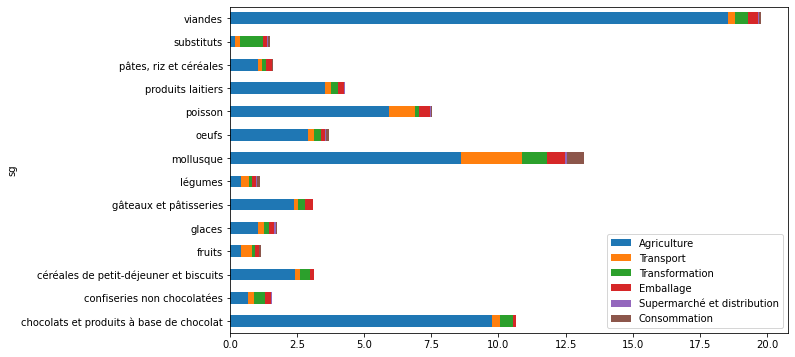

In [8]:

##agri.groupby(...variable sur laquelle on veut faire des groupes...)[[... variable à afficher 1, variable à afficher 2...]
agri_mean=agri.groupby("sg")[["Agriculture","Transport","Transformation","Emballage","Supermarché et distribution","Consommation"]].mean()

agri_mean.plot.barh(stacked=True, figsize=(10, 6));

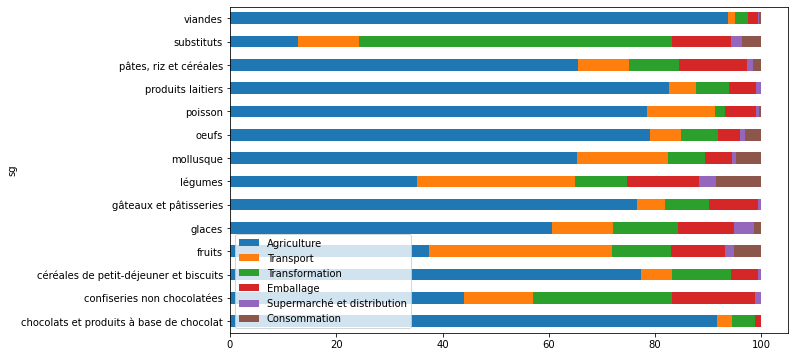

In [9]:
prop_data=agri_mean.apply(lambda x:x*100/sum(x),axis=1)

prop_data.plot.barh(stacked=True, figsize=(10, 6));

## En regardant la viande de plus près

In [10]:
ind=agri.index[agri["sg"]=="viandes"]
agri_viandes=agri.loc[agri["sg"]=="viandes"]
agri_viandes[["type_viande"]]="NA"

for i in ind:
    if "Agneau" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Agneau"
    elif "Porc" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Porc"
    elif "Boeuf" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Boeuf"  
    elif "Poulet" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Poulet"
    elif "Mouton" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Mouton"
    elif "Porc" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Porc"   
    elif "Veau" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Veau"
    elif "Dinde" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Dinde"
    elif "Canard" in agri_viandes.loc[i,"nom"]:
        agri_viandes.loc[i,"type_viande"]="Canard"
    else:
        agri_viandes.loc[i,"type_viande"]="Autre"
    

# agri_viandes[["type_viande"]]

agri_viandes_mean=agri_viandes.groupby("type_viande")[["Agriculture","Transport","Transformation","Emballage","Supermarché et distribution","Consommation"]].mean()
agri_viandes_mean

/tmp/ipykernel_6062/1725710039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_viandes[["type_viande"]]="NA"


,Agriculture,Transport,Transformation,Emballage,Supermarché et distribution,Consommation
type_viande,,,,,,
Agneau,43.619849,0.280132,0.073759,0.377568,0.051586,0.138838
Autre,15.464682,0.259377,0.390437,0.333710,0.046349,0.077619
Boeuf,30.727561,0.247570,0.121665,0.338749,0.045699,0.098268
Canard,6.133902,0.326539,1.237806,0.381791,0.051801,0.123164
Dinde,5.353871,0.281473,1.083982,0.325537,0.044499,0.066571
Mouton,30.783356,0.230665,0.051815,0.316605,0.042957,0.055885
Porc,8.777200,0.243408,0.910984,0.486583,0.043224,0.058646
Poulet,5.674485,0.307629,1.139288,0.361285,0.049019,0.101848
Veau,19.594051,0.248471,0.100704,0.341235,0.046301,0.111771


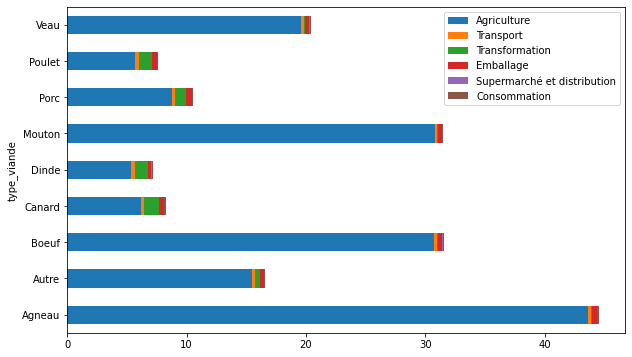

In [11]:
agri_viandes_mean.plot.barh(stacked=True, figsize=(10, 6));

## En regardant les fruits

/tmp/ipykernel_6062/3219781063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_fruits[["type_fruit"]]="NA"


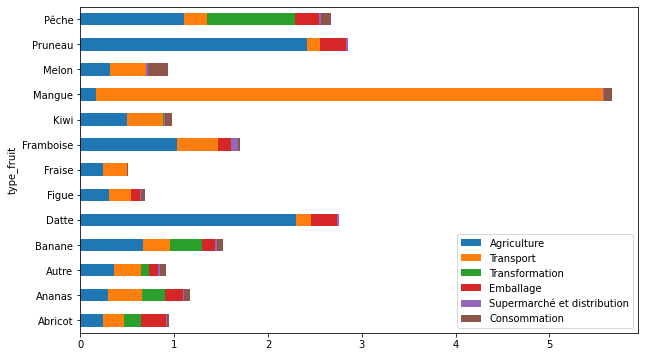

In [12]:
ind_fruits=agri.index[agri["sg"]=="fruits"]
agri_fruits=agri.loc[agri["sg"]=="fruits"]
agri_fruits[["type_fruit"]]="NA"



for i in ind_fruits:
    if "Mangue" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Mangue"
    elif "Abricot" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Abricot"
    elif "Banane" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Banane"  
    elif "Melon" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Melon"
    elif "Fraise" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Fraise"
    elif "Kiwi" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Kiwi"   
    elif "Ananas" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Ananas"
    elif "Framboise" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Framboise"
    elif "Datte" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Datte"
    elif "Pruneau" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Pruneau"
    elif "Pêche" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Pêche"
    elif "Figue" in agri_fruits.loc[i,"nom"]:
        agri_fruits.loc[i,"type_fruit"]="Figue"
    else:
        agri_fruits.loc[i,"type_fruit"]="Autre"
    

agri_fruits[["type_fruit"]]

agri_fruits_mean=agri_fruits.groupby("type_fruit")[["Agriculture","Transport","Transformation","Emballage","Supermarché et distribution","Consommation"]].mean()
agri_fruits_mean.plot.barh(stacked=True, figsize=(10, 6));

## Coût d'un repas

In [16]:
for i in ind:
    if agri_viandes.loc[i,"type_viande"]==("Agneau" or "Boeuf" or "Mouton" or "Veau"):
        agri_viandes.loc[i,"sg"]="viande rouge"
        

In [17]:
agri_mean_viandes=agri_viandes.groupby("sg")[["Total"]].mean()
agri_mean_sg=agri.groupby("sg")[["Total"]].mean()

def repas(type):
    base=0.200*agri_mean_sg.loc["légumes","Total"]+0.075*agri_mean_sg.loc["pâtes, riz et céréales","Total"]+0.050*agri_mean_sg.loc["produits laitiers","Total"]+0.100*agri_mean_sg.loc["fruits","Total"]
    if type=="vegan":
        cout=base+0.150*agri_mean_sg.loc["substituts","Total"]
    elif type=="vege":
        cout=base+0.150*agri_mean_sg.loc["oeufs","Total"]
    elif type=="poisson":
        cout=base+0.150*agri_mean_sg.loc["poisson","Total"]
    elif type=="viande rouge":
        cout=base+0.150*agri_mean_viandes.loc["viande rouge","Total"]  
    elif type=="viande blanche":   
        cout=base+0.150*agri_mean_viandes.loc["viandes","Total"]  
    return(cout)

In [18]:
tab_repas = ["vege","poisson","viande blanche","viande rouge"]
v1 = np.array([repas("vege"),repas("poisson"),repas("viande blanche"),repas("viande rouge")])


([<matplotlib.patches.Wedge at 0x772034ec0a90>,
 [Text(1.0568947264736164, 0.30491562300456104, 'vege'),
  Text(0.617347192116351, 0.9104298129927739, 'poisson'),
  Text(-0.6018989289847346, 0.9207158515454318, 'viande blanche'),
  Text(-0.12629186286590252, -1.092726116359383, 'viande rouge')])

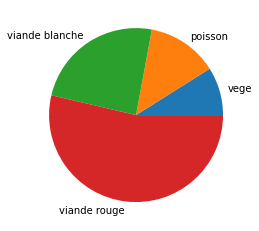

In [19]:
plt.pie(v1,labels=tab_repas)

## Combien de CO2 on économise en mangeant végétarien pendant un an par rapport à si on mange de la viande à tous les repas ?

In [20]:
economie_annuelle=365*repas("viande rouge")+365*repas("viande blanche")-2*365*repas("vege")

In [21]:
economie_annuelle

3001.8286861633387

En utilisant le site https://impactco2.fr/outils/comparateur on voit que 3000kg de C02 correspondent par exemple à 1.7 aller-retour Paris-New York en avion ou encore à la production de 35 smartphones.